In [6]:
import pandas
filename = "m8/mS/reads_seed0.tsv"

df = pandas.read_table(filename, delimiter = "\t", skiprows=3)

In [7]:
df.head()


,#sample_index,sample_label,anatomical_site_index,anatomical_site_label,character_index,character_label,ref,var
0,0,P_0,0,P,0,0,90,99
1,0,P_0,0,P,1,1,106,115
2,0,P_0,0,P,2,3,84,106
3,0,P_0,0,P,3,4,191,0
4,0,P_0,0,P,4,5,204,0


In [8]:
df['vaf'] = df.apply(lambda x: float(x['var'])/(x['ref']+x['var']), axis=1)
df[df['vaf'] > 0]['sample_label'].unique()

array(['P_0', 'P_1', 'M1_0', 'M2_0', 'M3_0', 'M4_0', 'M5_0', 'M6_0',
       'M7_0', 'M8_0'], dtype=object)

In [9]:
dfpivot = df.pivot(index = "character_index", columns = "sample_label", values = "vaf")

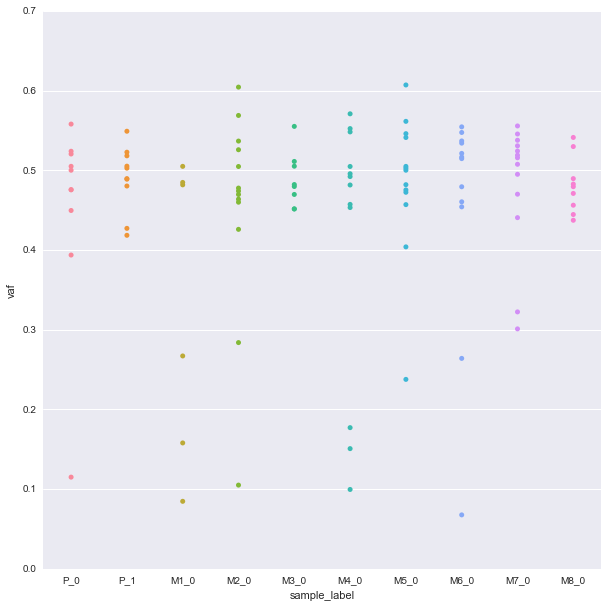

In [10]:
%matplotlib inline
from matplotlib import pyplot
import seaborn
seaborn.stripplot(data = df[df['vaf'] > 0], y= 'vaf',x = 'sample_label')
pyplot.gcf().set_size_inches(10,10)

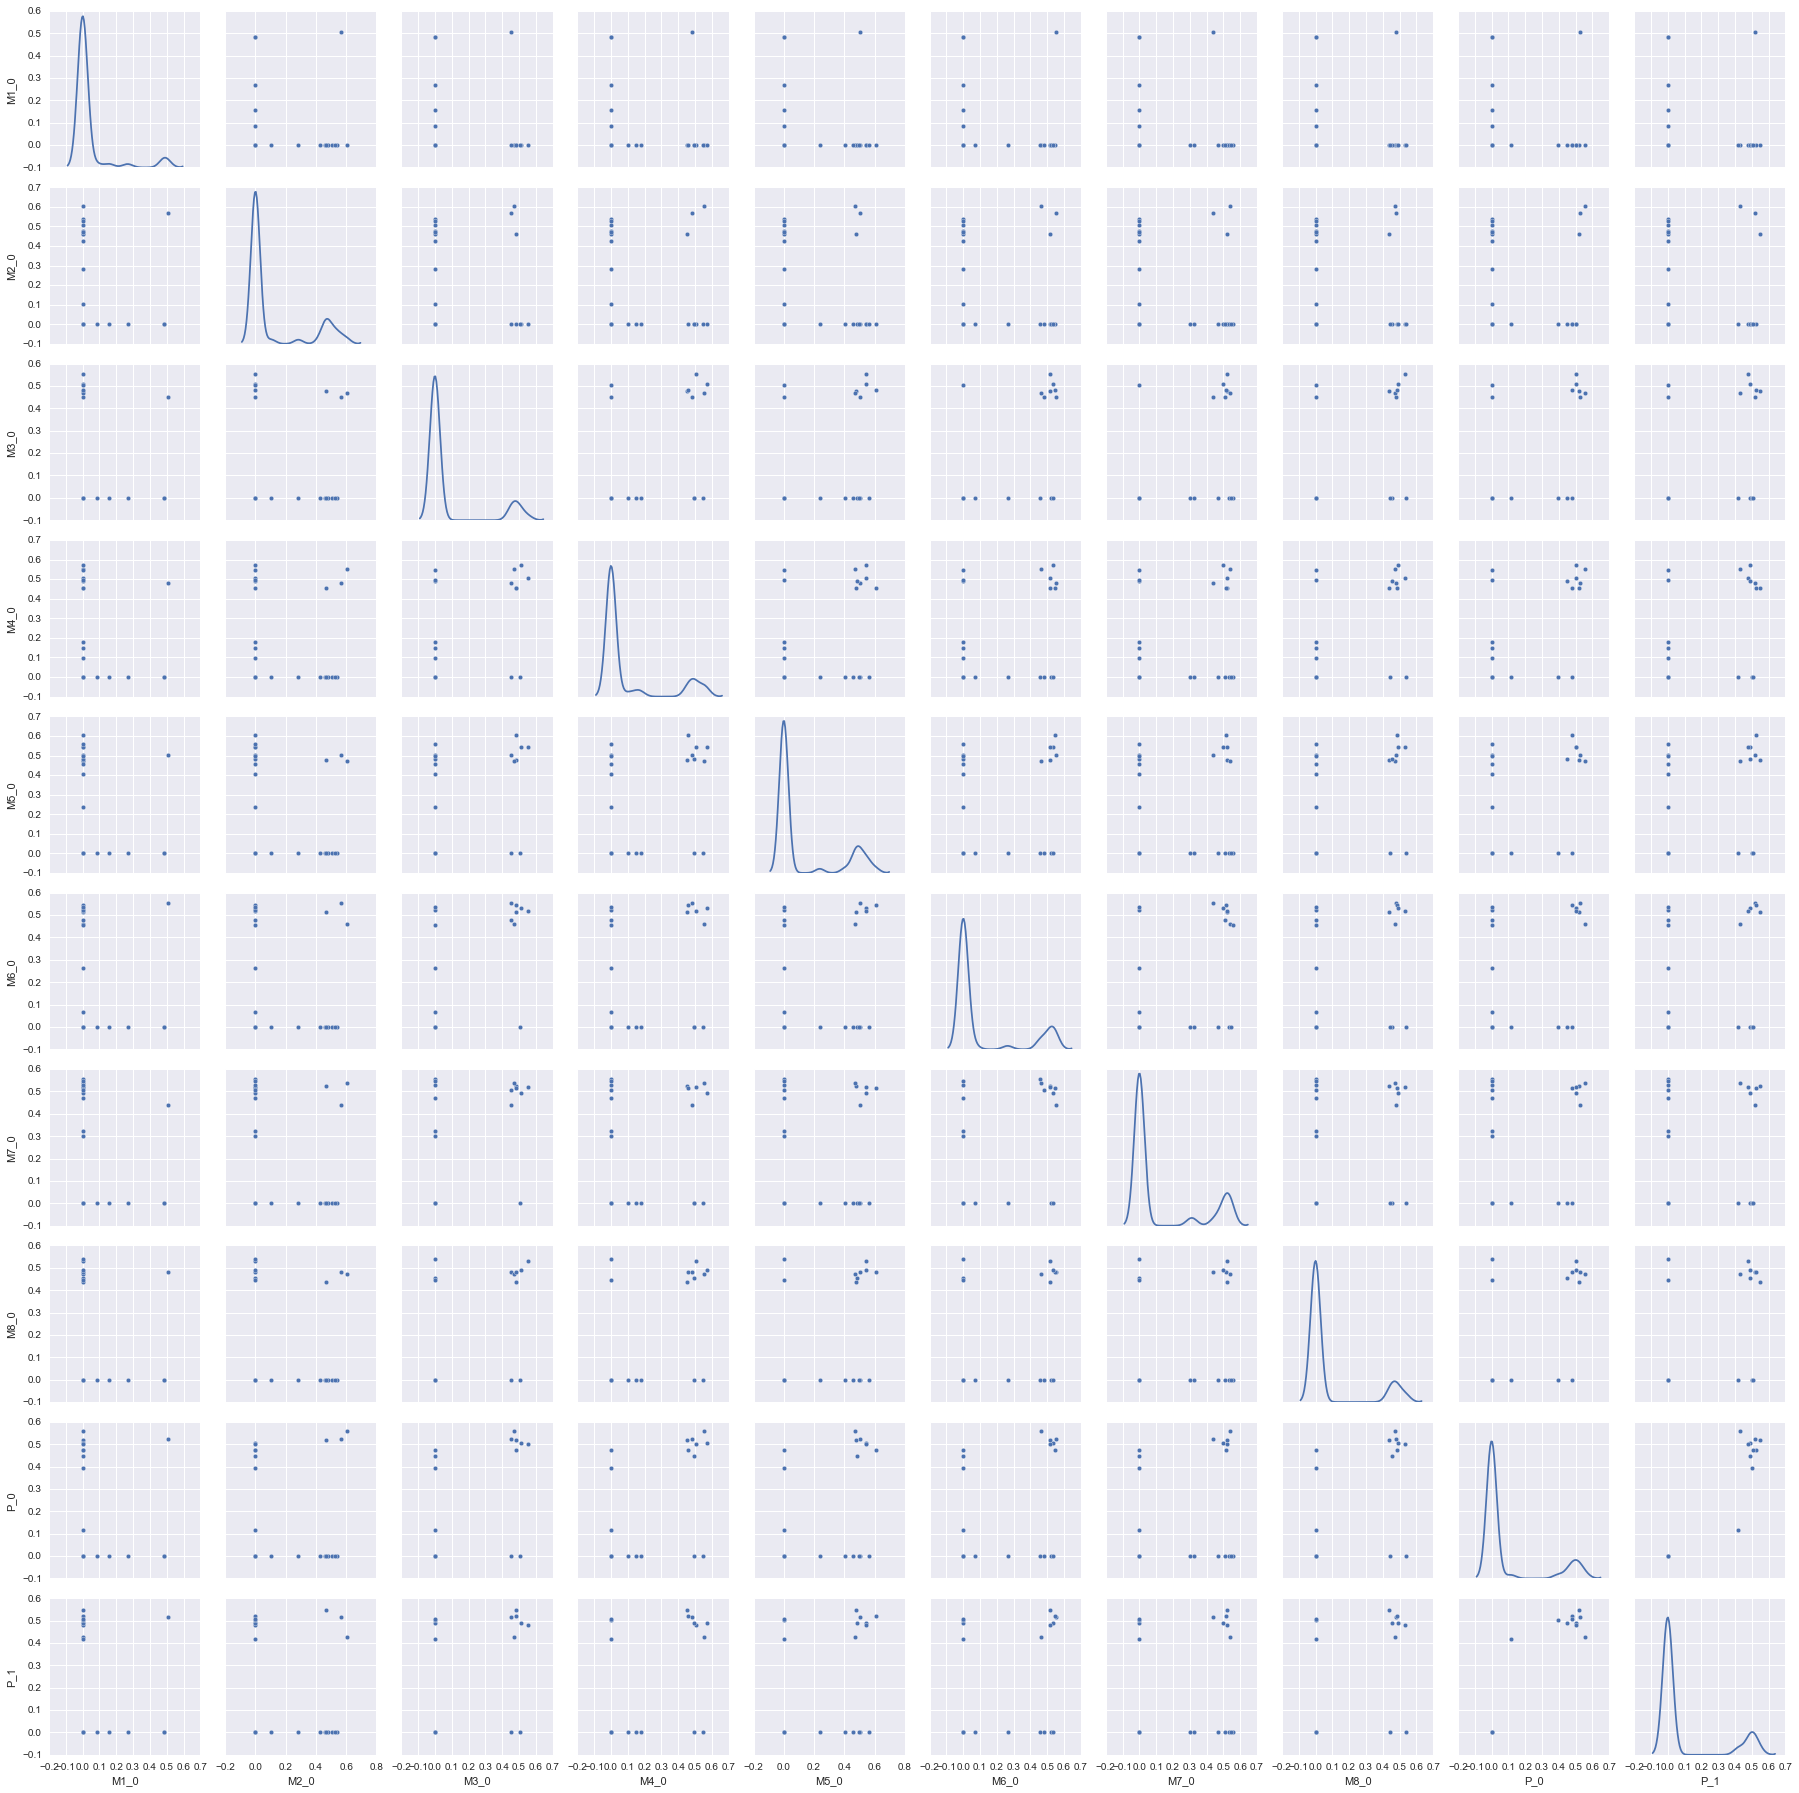

In [12]:

seaborn.pairplot(dfpivot, vars = [d for d in dfpivot.columns],  diag_kind = 'kde', diag_kws={'bw' : 0.03})
pyplot.savefig("Simul_0.pdf")

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


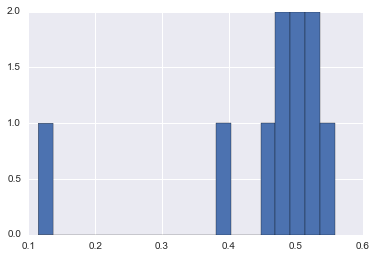

In [15]:
df[df['vaf'] > 0][df['sample_label'] == 'P_0']['vaf'].hist(bins=20)